<a href="https://colab.research.google.com/github/EstebanPezzi/EstebanPezzi/blob/main/learning_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intruduccion.Tensores

Un tensor en PyTorch es una estructura de datos fundamental que representa un arreglo multidimensional, similar a los arreglos (arrays) de NumPy, pero con características adicionales que lo hacen ideal para computación en GPU y para tareas de aprendizaje profundo. Los tensores son los bloques de construcción principales en PyTorch, y todos los modelos y operaciones en PyTorch giran en torno a ellos.

# Introduccion a pytorch y tensores

In [1]:
import torch
import numpy as np

In [2]:
lista = [[1, 2, 3, 4], [5, 6, 7, 8]]
print(lista)
# Datos que tendria un tensor bidimensional

[[1, 2, 3, 4], [5, 6, 7, 8]]


In [3]:
array_np = np.random.rand(5, 1) # Array ramdom de 5x1
array_np

array([[0.64095193],
       [0.5033848 ],
       [0.51210718],
       [0.05592059],
       [0.83197025]])

In [4]:
array_np.dtype

dtype('float64')

In [5]:
tensor_2d = torch.randn(5, 1)
tensor_2d

tensor([[ 0.0683],
        [-1.1311],
        [-0.5121],
        [ 0.6389],
        [ 0.6930]])

In [6]:
tensor_3d = torch.randn(5, 1, 3)
tensor_3d

tensor([[[ 0.2335, -0.1757,  0.1386]],

        [[ 1.5643,  0.9563, -1.8799]],

        [[ 1.8034,  0.4618, -1.0753]],

        [[ 1.6647,  0.3233, -0.5180]],

        [[ 0.7859, -0.0476,  0.1240]]])

In [7]:
# A diferencia de los arrays de np, el tipo de datos de torch es float32 (real de 32 bits)
tensor_3d.dtype

torch.float32

In [8]:
#Crear un tensor desde un array de numpy
tensor_np = torch.tensor(array_np)
tensor_np

tensor([[0.6410],
        [0.5034],
        [0.5121],
        [0.0559],
        [0.8320]], dtype=torch.float64)



# Operaciones con tensores

In [9]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# Reshape and View
my_torch = my_torch.reshape(2, 5)
my_torch
# La dimension debe ser exacta para que tenga la misma cantidad de elementos (2x5 = 10)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [11]:
my_torch2 = torch.arange(12)
my_torch2 = my_torch2.reshape(3, -1)
my_torch2
# En este caso el tensor se adapta creando n filas (3) de m/n elementos (12/3)
# Analogamente con las columnas (-1, 3)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [12]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
my_torch4 = my_torch3.reshape(2, 5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [14]:
my_torch3[5] = 0
my_torch3

tensor([0, 1, 2, 3, 4, 0, 6, 7, 8, 9])

In [15]:
my_torch4

tensor([[0, 1, 2, 3, 4],
        [0, 6, 7, 8, 9]])

Se puede ver que la variable my_torch4 apunta a my_torch3, por lo que cualquier cambio en el puntero al tensor repercute en la variable que apunta al mismo
Reshape cambia la estructura, pero los valores siguen siendo los del puntero original

# Operaciones matematicas

In [16]:
tensor_1 = torch.tensor([1, 2, 3, 4])
tensor_2 = torch.tensor([5, 6, 7, 8])

In [17]:
# Suma
tensor_1 + tensor_2

tensor([ 6,  8, 10, 12])

In [18]:
# Suma con metodo add
torch.add(tensor_1, tensor_2)

tensor([ 6,  8, 10, 12])

In [19]:
# Para la resta, multiplicacion y division es lo mismo
# Multiplicacion: .mul Division: .div Resta: .sub

In [20]:
# Resto de la division entera, metodo .reminder
tensor_2 % tensor_1

tensor([0, 0, 1, 0])

In [21]:
# Exponente .pow
torch.pow(tensor_2, tensor_1)

tensor([   5,   36,  343, 4096])

# Basics of Neural Networks

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [50]:
# Crear una Clase del modelo que herede de nn.Module
class Model(nn.Module):
  # Input layer (4 caracteristicas de la flor) -->
  # Hidden layer 1 ( numero de neuronas ) -->
  # H2 (n) -->
  # output ( 3 clases de iris de flores)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # Instanciar nn
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [51]:
# Seleccionar una semilla (seed)
torch.manual_seed(41)
# Crear la instancia del modelo
model = Model()

model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [54]:
# Transformo los targets de valor a numero
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

<ipython-input-54-18d68831b14d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [55]:
# Dividimos los datos para el entrenamiento
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [56]:
# Le asignamos los valores
X = X.values
y = y.values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Dividimos el lote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=41
  )
# test_size indica que el 20% de los datos se van a usar para entremaniento,
# el 80% restante para entrenamiento

In [59]:
# Convertimos las features en float tensors (ya que el dtype es float)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [60]:
# Lo mismo para las etiquetas
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [61]:
# Seleccionamos el criterio para medir el error, y asi calcular cuan lejos estan
# las predicciones de los datos reales
criterion = nn.CrossEntropyLoss()
# Adam optimizer, lr = learing rate (alpha)
# Adam es un tipo de SGD que optimiza los datos en cada EPOCH
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [62]:
# Entrenar el modelo
epochs = 150
losses = []
for i in range(epochs):
  # Predicciones
  y_pred = model.forward(X_train) # Resultados de la prediccion

  # Medir el error (loss)
  loss = criterion(y_pred, y_train) # Valor de la prediccion vs valor de entrenamiento
  losses.append(loss.detach().numpy())
  if not i % 10:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162348866462708
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165624648332596
Epoch: 80 and loss: 0.08606516569852829
Epoch: 90 and loss: 0.06522615253925323
Epoch: 100 and loss: 0.05286873131990433
Epoch: 110 and loss: 0.04508010298013687
Epoch: 120 and loss: 0.03979312255978584
Epoch: 130 and loss: 0.03596429154276848
Epoch: 140 and loss: 0.03302798792719841


Text(0.5, 0, 'Epoch')

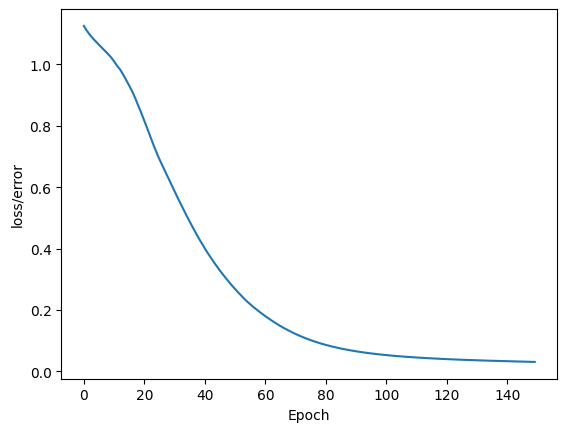

In [64]:
# Graficamos el error  (loss)
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [66]:
# Evaluar el modelo en data set de testeo
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss

tensor(0.1335)

In [73]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Nos va a decir que tipo de flor nuestro modelo cree que es
    print(f'{i + 1}.) {str(y_val)}\t{y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'Correctos {correct} Porcentaje de exito {100-loss*100}')

1.) tensor([-6.8390,  4.7297,  7.6532])	2
2.) tensor([-8.8131,  3.6532, 12.1399])	2
3.) tensor([-9.8806,  4.8574, 12.5906])	2
4.) tensor([-5.0596,  7.0781,  2.1046])	1
5.) tensor([-8.3986,  4.8905, 10.0807])	2
6.) tensor([-3.9134,  6.3876,  0.9962])	1
7.) tensor([-6.9198,  5.5000,  6.9320])	2
8.) tensor([-5.0164,  7.1870,  1.9126])	1
9.) tensor([-7.6433,  5.1899,  8.4883])	2
10.) tensor([-9.4160,  3.8555, 12.9299])	2
11.) tensor([-6.6340,  5.5288,  6.4336])	2
12.) tensor([ 5.8841, -3.3131, -4.3749])	0
13.) tensor([ 5.4591, -2.9628, -4.0601])	0
14.) tensor([-2.4229,  4.8089,  0.3016])	1
15.) tensor([ 4.3864, -1.8474, -3.5327])	0
16.) tensor([-6.3743,  5.8948,  5.6080])	2
17.) tensor([ 5.2143, -2.6992, -3.9687])	0
18.) tensor([-6.7679,  4.9657,  7.2864])	1
19.) tensor([ 6.4783, -3.9004, -4.6793])	0
20.) tensor([ 4.3613, -1.8954, -3.4533])	0
21.) tensor([-2.9994,  5.4193,  0.5717])	1
22.) tensor([-9.0598,  4.4688, 11.6513])	2
23.) tensor([ 4.5177, -1.9790, -3.6063])	0
24.) tensor([ 5.8305